In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [21]:
df=pd.read_csv(r"c:\DATA SCIENCE\Machine_Learning\india_housing_prices.csv")
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [22]:
df.shape

(250000, 23)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [24]:
df.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [25]:
df.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df_num=df.select_dtypes(include="number")
df_num
df_num.shape
df_num.columns

Index(['ID', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt',
       'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals'],
      dtype='object')

In [28]:
df_cat=df.select_dtypes(include="object")
df_cat.shape
df_cat.columns


Index(['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status',
       'Public_Transport_Accessibility', 'Parking_Space', 'Security',
       'Amenities', 'Facing', 'Owner_Type', 'Availability_Status'],
      dtype='object')

In [29]:
df_num.isnull().sum()    #---->no null values

ID                  0
BHK                 0
Size_in_SqFt        0
Price_in_Lakhs      0
Price_per_SqFt      0
Year_Built          0
Floor_No            0
Total_Floors        0
Age_of_Property     0
Nearby_Schools      0
Nearby_Hospitals    0
dtype: int64

In [30]:
df_cat.isnull().sum()     #---->no null values

State                             0
City                              0
Locality                          0
Property_Type                     0
Furnished_Status                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [31]:
df_num.duplicated().sum()
df_cat.duplicated().sum()   # no duplicated values

np.int64(4)

<Axes: >

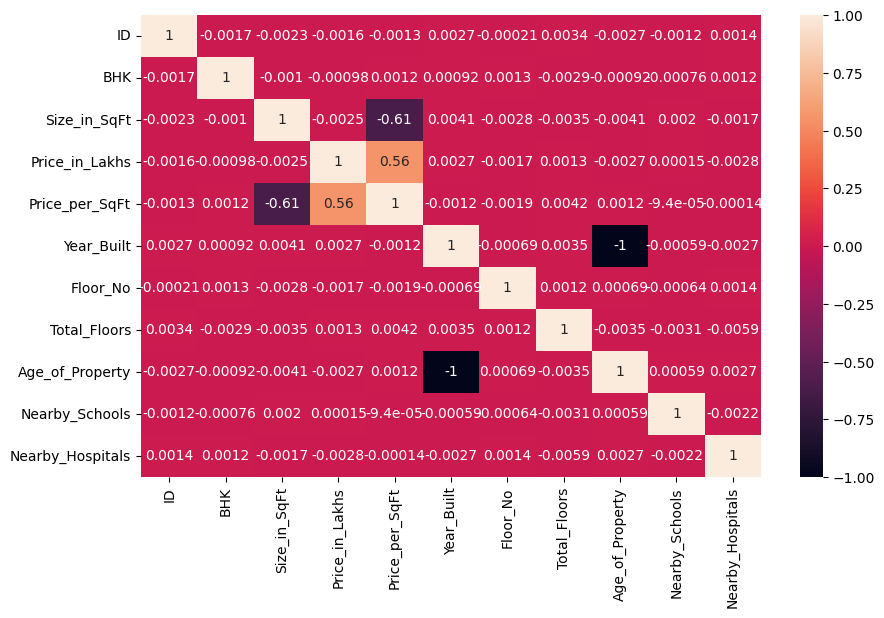

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(),annot=True)

In [33]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [34]:
df.columns=df.columns.str.strip()   #used to rearrange the columns if we have any spaces it will neglete and re write

In [35]:
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [36]:
df["Property_Type"].value_counts()  #label encoding
df["Furnished_Status"].value_counts()  #label encoding
df["Public_Transport_Accessibility"].value_counts()  #label encoding
df["Parking_Space"].value_counts()  #label encoding
df["Security"].value_counts()  #label encoding
df["Owner_Type"].value_counts()  #label encoding
df["Availability_Status"].value_counts()  #label encoding
#since the above all columns are having 2 or 3 features so iam doing label encoding

Availability_Status
Under_Construction    125035
Ready_to_Move         124965
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Property_Type"]=encoder.fit_transform(df["Property_Type"])
df["Furnished_Status"]=encoder.fit_transform(df["Furnished_Status"])
df["Public_Transport_Accessibility"]=encoder.fit_transform(df["Public_Transport_Accessibility"])
df["Parking_Space"]=encoder.fit_transform(df["Parking_Space"])
df["Security"]=encoder.fit_transform(df["Security"])
df["Owner_Type"]=encoder.fit_transform(df["Owner_Type"])
df["Availability_Status"]=encoder.fit_transform(df["Availability_Status"])

In [38]:
df.select_dtypes(exclude="number").head()   #having 5 categorie columns

,State,City,Locality,Amenities,Facing
0,Tamil Nadu,Chennai,Locality_84,"Playground, Gym, Garden, Pool, Clubhouse",West
1,Maharashtra,Pune,Locality_490,"Playground, Clubhouse, Pool, Gym, Garden",North
2,Punjab,Ludhiana,Locality_167,"Clubhouse, Pool, Playground, Gym",South
3,Rajasthan,Jodhpur,Locality_393,"Playground, Clubhouse, Gym, Pool, Garden",North
4,Rajasthan,Jaipur,Locality_466,"Playground, Garden, Gym, Pool, Clubhouse",East


In [39]:
df.drop(["Year_Built","ID"],axis=1,inplace=True)

In [40]:
df.drop(["City","Amenities"],axis=1,inplace=True)

In [41]:
df.head(2)

,State,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Facing,Owner_Type,Availability_Status
0,Tamil Nadu,Locality_84,0,1,4740,489.76,0.10,0,22,1,35,10,3,0,0,0,West,2,0
1,Maharashtra,Locality_490,1,3,2364,195.52,0.08,2,21,20,17,8,1,1,0,1,North,1,1


In [42]:
from sklearn.preprocessing import OneHotEncoder
ohencoder=OneHotEncoder()
df["State"]=encoder.fit_transform(df["State"])
df["Locality"]=encoder.fit_transform(df["Locality"])
df["Facing"]=encoder.fit_transform(df["Facing"])

In [43]:
df.head()

,State,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Facing,Owner_Type,Availability_Status
0,15,483,0,1,4740,489.76,0.10,0,22,1,35,10,3,0,0,0,3,2,0
1,11,434,1,3,2364,195.52,0.08,2,21,20,17,8,1,1,0,1,1,1,1
2,13,75,0,2,3642,183.79,0.05,1,19,27,28,9,8,1,1,0,2,0,0
3,14,326,1,2,2741,300.29,0.11,0,21,26,34,5,7,0,1,1,1,1,0
4,14,407,2,4,4823,182.90,0.04,1,3,2,23,4,9,1,0,1,0,1,0


In [44]:
x=df.drop("Price_in_Lakhs",axis=1)
y=df["Price_in_Lakhs"]

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,train_size=0.85)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((212500, 18), (37500, 18), (212500,), (37500,))

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)
y_predict=lin_model.predict(x_test)
print(r2_score(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))

0.49547550917436756
10059.569487295812
80.79244683518003


In [47]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor()
knn_model.fit(x_train,y_train)
y_predict_knn=knn_model.predict(x_test)
print(r2_score(y_test,y_predict_knn))
print(mean_squared_error(y_test,y_predict_knn))
print(mean_absolute_error(y_test,y_predict_knn))

-0.19492982164968153
23825.363866194024
130.04179205333332


In [48]:
from sklearn.svm import LinearSVR
svr_model=LinearSVR()
svr_model.fit(x_train,y_train)
y_predict_svr=svr_model.predict(x_test)
print(r2_score(y_test,y_predict_svr))
print(mean_squared_error(y_test,y_predict_svr))
print(mean_absolute_error(y_test,y_predict_svr))

0.37485068824425327
12464.673283254988
92.24833637413877


c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [49]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_predict_dt=dt_model.predict(x_test)
print(r2_score(y_test,y_predict_dt))
print(mean_squared_error(y_test,y_predict_dt))
print(mean_absolute_error(y_test,y_predict_dt))

0.9922371558522598
154.78112865333333
9.179463733333334


In [50]:
from sklearn.ensemble import RandomForestRegressor
def metrics(true,predict):
    mae = mean_absolute_error(true,predict)
    mse = mean_squared_error(true,predict)
    rmse = np.sqrt(mean_squared_error(true,predict))
    r2_square = r2_score(true,predict)
    return mae, rmse, r2_square

In [53]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
models={
    "linear regression":LinearRegression(),
    "lasso":Lasso(),
    "ridge":Ridge(),
    "decision_tree":DecisionTreeRegressor(),
    "random forest regressior":RandomForestRegressor()
}

In [56]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse,model_train_r2 = metrics(y_train, y_train_pred)
    model_test_mae , model_test_rmse, odel_test_r2 = metrics(y_test, y_test_pred)
    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print('='*35)
    print('\n')

linear regression
Model performance for Training set
- Root Mean Squared Error: 100.6707
- Mean Absolute Error: 81.0033
- R2 Score: 0.4929
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 100.2974
- Mean Absolute Error: 80.7924
- R2 Score: 0.9922


lasso
Model performance for Training set
- Root Mean Squared Error: 101.1390
- Mean Absolute Error: 83.1522
- R2 Score: 0.4882
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 100.8673
- Mean Absolute Error: 82.9233
- R2 Score: 0.9922


ridge
Model performance for Training set
- Root Mean Squared Error: 100.6707
- Mean Absolute Error: 81.0121
- R2 Score: 0.4929
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 100.2980
- Mean Absolute Error: 80.8012
- R2 Score: 0.9922


decision_tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
-------------